In [9]:
import torch
from torch_geometric.data import Dataset
from torch_geometric.loader import DataLoader
from torch_geometric.utils.convert import from_networkx, to_networkx
import glob
import networkx as nx
import pickle
import sys
sys.path.append('../')
from utils import GraphDataset
from matplotlib import pyplot as plt

In [10]:
# Load the dataset from graph directory: ../../data/sub20/graphs
dataset = GraphDataset(root='../../data/sub20/graphs')

In [11]:
# we create a torch dataloader from the dataset
loader = DataLoader(dataset, batch_size=32, shuffle=True)

0
Batch 0


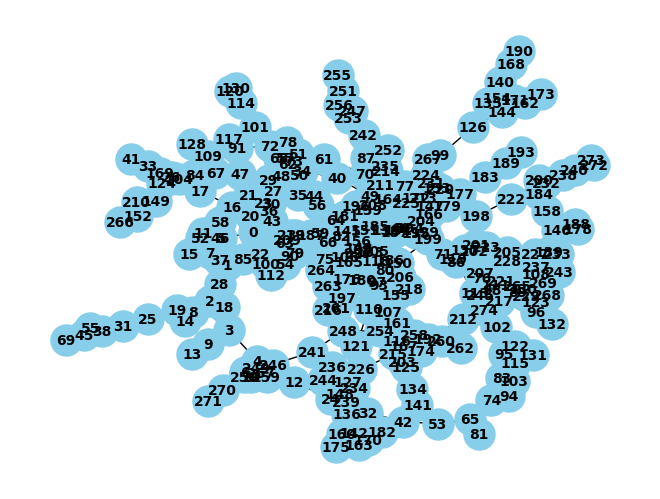

1
Batch 1


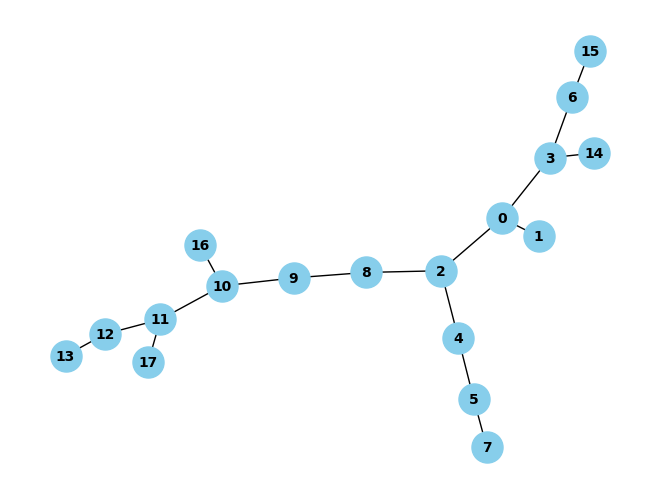

2
Batch 2


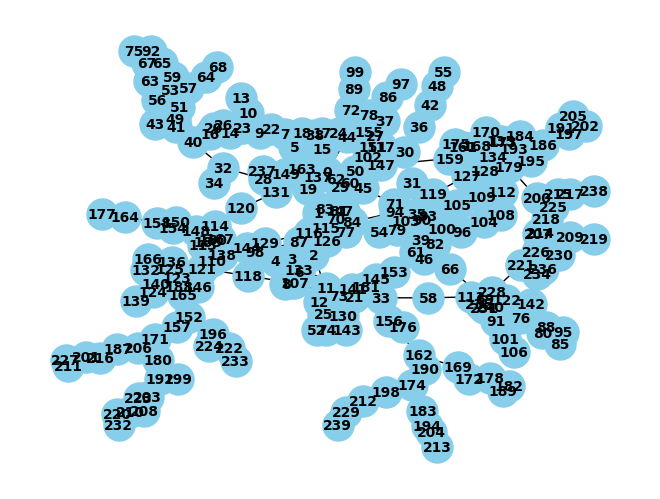

3
Batch 3


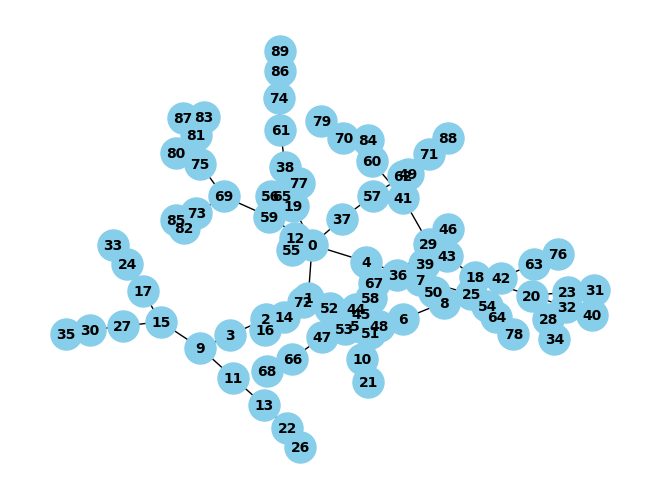

4
Batch 4


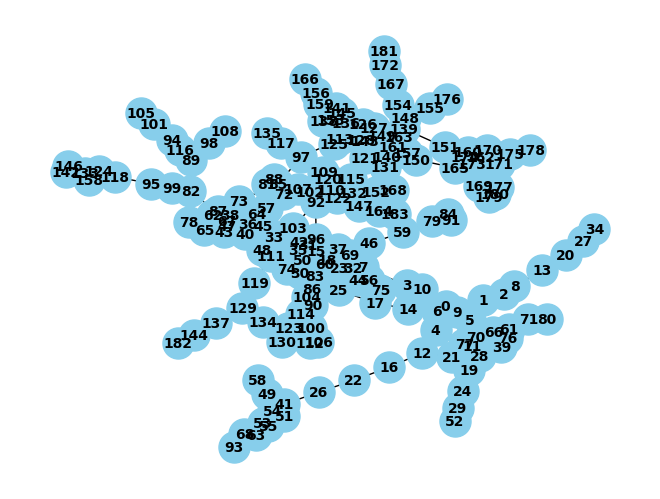

5
Batch 5


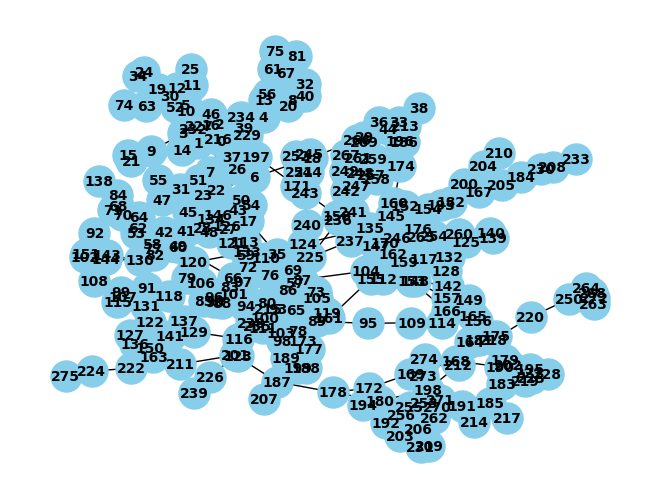

6
Batch 6


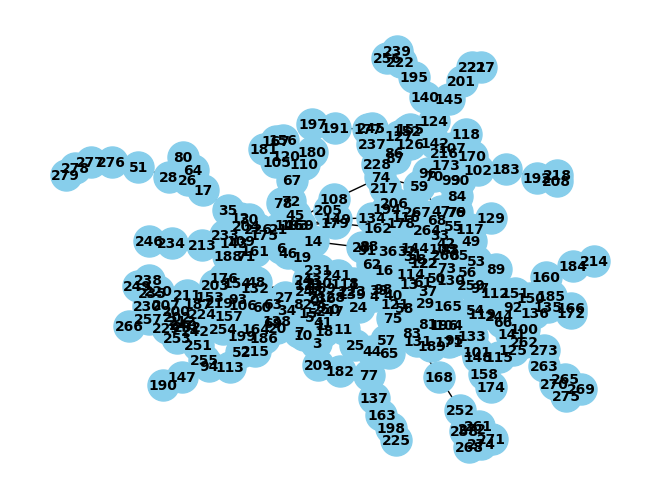

7
Batch 7


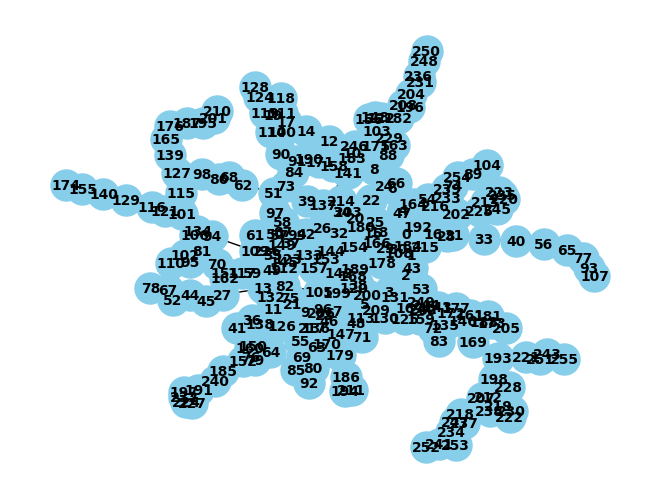

8
Batch 8


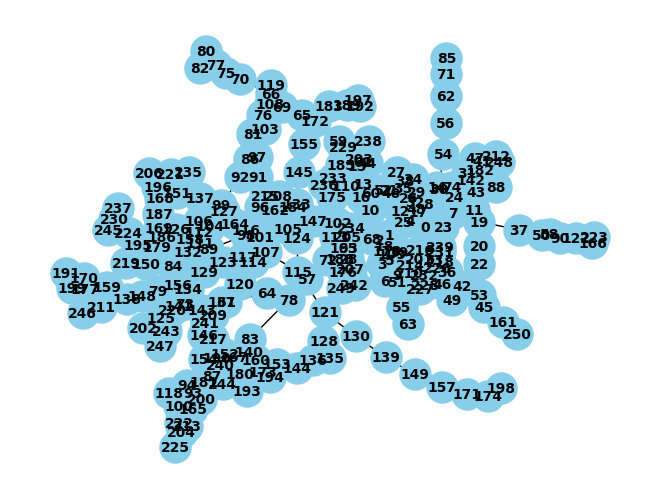

9
Batch 9


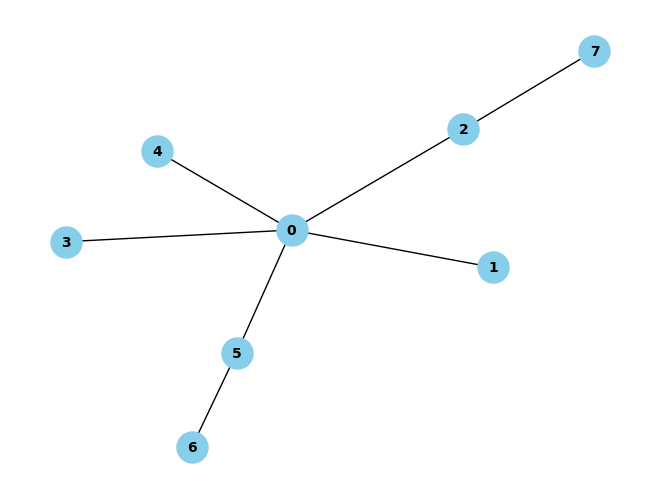

10


In [12]:

for i, batch in enumerate(loader):
    print(i)
    if i == 10:
        break
    print(f'Batch {i}')
    # Select edges belonging to the first graph
    edge_mask = batch.batch[batch.edge_index[0]] == 0
    filtered_edge_index = batch.edge_index[:, edge_mask]

    # Identify the unique nodes associated with these edges
    unique_nodes = torch.unique(filtered_edge_index)

    # Create a subgraph with only the selected nodes and edges
    subgraph = batch.clone()
    subgraph.edge_index = filtered_edge_index
    subgraph.num_nodes = unique_nodes.size(0)  # Update the number of nodes
    subgraph.batch = batch.batch[unique_nodes]  # Update the batch tensor for these nodes
    
    # Convert the subgraph to NetworkX for visualization
    G_nx = to_networkx(subgraph, to_undirected=True, node_attrs=[], edge_attrs=[])
    nx.draw(G_nx, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold")
    plt.show()

